In [2]:
import re
import pandas as pd

In [3]:
f = open("WhatsApp Chat with [PY'PRO].txt", "r", encoding="utf-8")

In [4]:
data = f.read()

In [6]:
data

'27/02/23, 22:32 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n22/05/21, 21:53 - ~\u202fshiv sharma created group "[PY\'PRO]"\n22/05/21, 21:53 - This group was added to the community "PY\'PRO." Tap to view.\n22/05/21, 21:53 - New participants need admin approval to join this group.\n27/02/23, 22:32 - You joined using this group\'s invite link\n27/02/23, 23:29 - +91 80006 79904: https://twitter.com/pyprocommunity/status/1630265821900468226?s=20\n28/02/23, 07:27 - +91 94998 59046: <Media omitted>\n28/02/23, 07:40 - +91 99258 58435 joined using this group\'s invite link\n28/02/23, 07:50 - +91 94998 59046: https://infinityai.hashnode.dev/day-3-of-30daysofcode-area-and-circumference-calculation\n28/02/23, 07:51 - +91 94998 59046: https://infinityai.hashnode.dev/day-4-of-30daysofcode-string-functions\n28/02/23, 07:52 - +91 94998 59046: https://infinityai.hashnode.dev/day-5-of-30daysofcode-list-op

In [7]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [8]:
messages = re.split(pattern, data)[1:]
len(messages)
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '~\u202fshiv sharma created group "[PY\'PRO]"\n',
 'This group was added to the community "PY\'PRO." Tap to view.\n',
 'New participants need admin approval to join this group.\n',
 "You joined using this group's invite link\n",
 '+91 80006 79904: https://twitter.com/pyprocommunity/status/1630265821900468226?s=20\n',
 '+91 94998 59046: <Media omitted>\n',
 "+91 99258 58435 joined using this group's invite link\n",
 '+91 94998 59046: https://infinityai.hashnode.dev/day-3-of-30daysofcode-area-and-circumference-calculation\n',
 '+91 94998 59046: https://infinityai.hashnode.dev/day-4-of-30daysofcode-string-functions\n',
 '+91 94998 59046: https://infinityai.hashnode.dev/day-5-of-30daysofcode-list-operations\n',
 "+91 88662 24546 joined using this group's invite link\n",
 "+91 72839 87212 joined using this group's invite link\n",
 "+91 6354 039 3

In [10]:
dates = re.findall(pattern, data)
dates

['27/02/23, 22:32 - ',
 '22/05/21, 21:53 - ',
 '22/05/21, 21:53 - ',
 '22/05/21, 21:53 - ',
 '27/02/23, 22:32 - ',
 '27/02/23, 23:29 - ',
 '28/02/23, 07:27 - ',
 '28/02/23, 07:40 - ',
 '28/02/23, 07:50 - ',
 '28/02/23, 07:51 - ',
 '28/02/23, 07:52 - ',
 '28/02/23, 12:18 - ',
 '28/02/23, 13:05 - ',
 '28/02/23, 14:53 - ',
 '28/02/23, 18:38 - ',
 '28/02/23, 20:11 - ',
 '28/02/23, 22:13 - ',
 '01/03/23, 07:54 - ',
 '01/03/23, 07:55 - ',
 '01/03/23, 07:55 - ',
 '01/03/23, 08:15 - ',
 '01/03/23, 09:37 - ',
 '01/03/23, 10:10 - ',
 '01/03/23, 10:11 - ',
 '01/03/23, 10:13 - ',
 '01/03/23, 10:21 - ',
 '01/03/23, 10:44 - ',
 '01/03/23, 11:10 - ',
 '01/03/23, 11:43 - ',
 '01/03/23, 12:26 - ',
 '01/03/23, 12:37 - ',
 '01/03/23, 12:38 - ',
 '01/03/23, 14:16 - ',
 '01/03/23, 15:01 - ',
 '01/03/23, 15:01 - ',
 '01/03/23, 15:10 - ',
 '01/03/23, 15:14 - ',
 '01/03/23, 16:50 - ',
 '01/03/23, 18:48 - ',
 '01/03/23, 20:12 - ',
 '01/03/23, 20:17 - ',
 '01/03/23, 20:19 - ',
 '01/03/23, 20:57 - ',
 '01/03/23,

In [11]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-02-27 22:32:00
1,"~ shiv sharma created group ""[PY'PRO]""\n",2021-05-22 21:53:00
2,"This group was added to the community ""PY'PRO....",2021-05-22 21:53:00
3,New participants need admin approval to join t...,2021-05-22 21:53:00
4,You joined using this group's invite link\n,2023-02-27 22:32:00


In [12]:
df.shape

(1741, 2)

***separate Users and messages***

In [13]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:# user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '~\u202fshiv sharma created group "[PY\'PRO]"\n',
 'This group was added to the community "PY\'PRO." Tap to view.\n',
 'New participants need admin approval to join this group.\n',
 "You joined using this group's invite link\n",
 'https://twitter.com/pyprocommunity/status/1630265821900468226?s=20\n',
 '<Media omitted>\n',
 "+91 99258 58435 joined using this group's invite link\n",
 'https://infinityai.hashnode.dev/day-3-of-30daysofcode-area-and-circumference-calculation\n',
 'https://infinityai.hashnode.dev/day-4-of-30daysofcode-string-functions\n',
 'https://infinityai.hashnode.dev/day-5-of-30daysofcode-list-operations\n',
 "+91 88662 24546 joined using this group's invite link\n",
 "+91 72839 87212 joined using this group's invite link\n",
 "+91 6354 039 379 joined using this group's invite link\n",
 'Anybody a GDSC leader ? Need some advi

In [14]:
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

In [15]:
df.tail(11)

,date,user,message
1730,2023-07-10 10:29:00,group_notification,+91 94256 39528 joined using this group's invi...
1731,2023-07-10 18:08:00,+91 73837 36870,Hello People\nHow many of you are going to Att...
1732,2023-07-10 18:11:00,+91 93287 29731,I want to go. I'll let you know after the hack...
1733,2023-07-10 18:11:00,+91 94256 39528,Same here i m from ahemdabad itself\n
1734,2023-07-10 18:11:00,+91 73837 36870,let us know so that we can book\n
1735,2023-07-10 18:12:00,+91 93287 29731,Sure I'll inform as soon as possible.\n
1736,2023-07-10 18:20:00,+91 73837 36870,So are you coming or not?\n
1737,2023-07-10 18:22:00,+91 94256 39528,Yeah i want to come if i get the ticket from h...
1738,2023-07-10 20:42:00,+91 89499 87776,Hello guy's\nAnyone having working experience ...
1739,2023-07-10 22:15:00,group_notification,Your security code with +91 78743 15954 change...


In [16]:
df['year'] = df['date'].dt.year
df.head()

,date,user,message,year
0,2023-02-27 22:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2021-05-22 21:53:00,group_notification,"~ shiv sharma created group ""[PY'PRO]""\n",2021
2,2021-05-22 21:53:00,group_notification,"This group was added to the community ""PY'PRO....",2021
3,2021-05-22 21:53:00,group_notification,New participants need admin approval to join t...,2021
4,2023-02-27 22:32:00,group_notification,You joined using this group's invite link\n,2023


In [17]:
df['month'] = df['date'].dt.month_name()
df.head()

,date,user,message,year,month
0,2023-02-27 22:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,February
1,2021-05-22 21:53:00,group_notification,"~ shiv sharma created group ""[PY'PRO]""\n",2021,May
2,2021-05-22 21:53:00,group_notification,"This group was added to the community ""PY'PRO....",2021,May
3,2021-05-22 21:53:00,group_notification,New participants need admin approval to join t...,2021,May
4,2023-02-27 22:32:00,group_notification,You joined using this group's invite link\n,2023,February


In [18]:
df['day'] = df['date'].dt.day
df.head()

,date,user,message,year,month,day
0,2023-02-27 22:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,February,27
1,2021-05-22 21:53:00,group_notification,"~ shiv sharma created group ""[PY'PRO]""\n",2021,May,22
2,2021-05-22 21:53:00,group_notification,"This group was added to the community ""PY'PRO....",2021,May,22
3,2021-05-22 21:53:00,group_notification,New participants need admin approval to join t...,2021,May,22
4,2023-02-27 22:32:00,group_notification,You joined using this group's invite link\n,2023,February,27


In [19]:
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-02-27 22:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,February,27,22,32
1,2021-05-22 21:53:00,group_notification,"~ shiv sharma created group ""[PY'PRO]""\n",2021,May,22,21,53
2,2021-05-22 21:53:00,group_notification,"This group was added to the community ""PY'PRO....",2021,May,22,21,53
3,2021-05-22 21:53:00,group_notification,New participants need admin approval to join t...,2021,May,22,21,53
4,2023-02-27 22:32:00,group_notification,You joined using this group's invite link\n,2023,February,27,22,32


In [21]:
words = []
for msg in df['message']:
    words.extend(msg.split())
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '~',
 'shiv',
 'sharma',
 'created',
 'group',
 '"[PY\'PRO]"',
 'This',
 'group',
 'was',
 'added',
 'to',
 'the',
 'community',
 '"PY\'PRO."',
 'Tap',
 'to',
 'view.',
 'New',
 'participants',
 'need',
 'admin',
 'approval',
 'to',
 'join',
 'this',
 'group.',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'https://twitter.com/pyprocommunity/status/1630265821900468226?s=20',
 '<Media',
 'omitted>',
 '+91',
 '99258',
 '58435',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'https://infinityai.hashnode.dev/day-3-of-30daysofcode-area-and-circumference-calculation',
 'https://infinityai.hashnode.dev/day-4-of-30daysofcode-string-functions',
 'https://infinityai.hashnode.dev/day-5-of-30daysofcode-list-operations',


In [22]:
media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]
media_messages

190

In [23]:
df['user'].value_counts().head()

+91 6353 248 985      295
group_notification    218
+91 93287 29731       126
+91 98284 91881       104
+91 89499 87776        77
Name: user, dtype: int64

<AxesSubplot:>

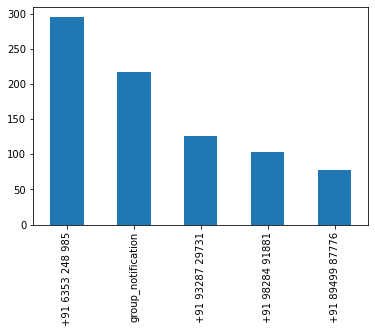

In [24]:
df['user'].value_counts().head().plot.bar()

In [25]:
round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={'index': 'name', 'user': 'percentage'})

,name,percentage
0,+91 6353 248 985,16.94
1,group_notification,12.52
2,+91 93287 29731,7.24
3,+91 98284 91881,5.97
4,+91 89499 87776,4.42
...,...,...
108,+91 80000 19350,0.06
109,+91 81600 41305,0.06
110,+91 81530 51179,0.06
111,+91 98257 93013,0.06


In [53]:
temp = df[df['user'] != 'group_notification']

In [38]:
temp = temp[temp['message'] != '<Media omitted>\n']
temp

,date,user,message,year,month,day,hour,minute
5,2023-02-27 23:29:00,+91 80006 79904,https://twitter.com/pyprocommunity/status/1630...,2023,February,27,23,29
8,2023-02-28 07:50:00,+91 94998 59046,https://infinityai.hashnode.dev/day-3-of-30day...,2023,February,28,7,50
9,2023-02-28 07:51:00,+91 94998 59046,https://infinityai.hashnode.dev/day-4-of-30day...,2023,February,28,7,51
10,2023-02-28 07:52:00,+91 94998 59046,https://infinityai.hashnode.dev/day-5-of-30day...,2023,February,28,7,52
14,2023-02-28 18:38:00,+91 79909 31665,Anybody a GDSC leader ? Need some advice.\n,2023,February,28,18,38
...,...,...,...,...,...,...,...,...
1734,2023-07-10 18:11:00,+91 73837 36870,let us know so that we can book\n,2023,July,10,18,11
1735,2023-07-10 18:12:00,+91 93287 29731,Sure I'll inform as soon as possible.\n,2023,July,10,18,12
1736,2023-07-10 18:20:00,+91 73837 36870,So are you coming or not?\n,2023,July,10,18,20
1737,2023-07-10 18:22:00,+91 94256 39528,Yeah i want to come if i get the ticket from h...,2023,July,10,18,22


In [49]:
f = open('stopwords_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
:-
*
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could

In [52]:
words = []
for msg in temp['message']:
    for word in msg.lower().split():
        if word not in stop_words:
            words.append(word)
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,46
1,deleted,44
2,share,38
3,community,37
4,docker,35
5,ahmedabad,34
6,📌,34
7,free,33
8,dm,27
9,event,24


In [57]:
df['month_num'] = df['date'].dt.month 

In [60]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [61]:
timeline

,year,month_num,month,message
0,2021,5,May,3
1,2023,2,February,14
2,2023,3,March,668
3,2023,4,April,441
4,2023,5,May,324
5,2023,6,June,216
6,2023,7,July,75


In [67]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+ '-' + str(timeline['year'][i]))
time

['May-2021',
 'February-2023',
 'March-2023',
 'April-2023',
 'May-2023',
 'June-2023',
 'July-2023']

In [68]:
timeline['time'] = time

In [69]:
timeline

,year,month_num,month,message,time
0,2021,5,May,3,May-2021
1,2023,2,February,14,February-2023
2,2023,3,March,668,March-2023
3,2023,4,April,441,April-2023
4,2023,5,May,324,May-2023
5,2023,6,June,216,June-2023
6,2023,7,July,75,July-2023


In [71]:
df['only_date'] = df['date'].dt.date

In [72]:
daily_timeline = df.groupby(['only_date']).count()['message'].reset_index()

,only_date,message
0,2021-05-22,3
1,2023-02-27,3
2,2023-02-28,11
3,2023-03-01,33
4,2023-03-02,6
...,...,...
126,2023-07-06,8
127,2023-07-07,2
128,2023-07-08,6
129,2023-07-09,6


In [77]:
df['day_name'] = df['date'].dt.day_name()
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2023-02-27 22:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,February,27,22,32,2,2023-02-27,Monday
1,2021-05-22 21:53:00,group_notification,"~ shiv sharma created group ""[PY'PRO]""\n",2021,May,22,21,53,5,2021-05-22,Saturday
2,2021-05-22 21:53:00,group_notification,"This group was added to the community ""PY'PRO....",2021,May,22,21,53,5,2021-05-22,Saturday
3,2021-05-22 21:53:00,group_notification,New participants need admin approval to join t...,2021,May,22,21,53,5,2021-05-22,Saturday
4,2023-02-27 22:32:00,group_notification,You joined using this group's invite link\n,2023,February,27,22,32,2,2023-02-27,Monday
...,...,...,...,...,...,...,...,...,...,...,...
1736,2023-07-10 18:20:00,+91 73837 36870,So are you coming or not?\n,2023,July,10,18,20,7,2023-07-10,Monday
1737,2023-07-10 18:22:00,+91 94256 39528,Yeah i want to come if i get the ticket from h...,2023,July,10,18,22,7,2023-07-10,Monday
1738,2023-07-10 20:42:00,+91 89499 87776,Hello guy's\nAnyone having working experience ...,2023,July,10,20,42,7,2023-07-10,Monday
1739,2023-07-10 22:15:00,group_notification,Your security code with +91 78743 15954 change...,2023,July,10,22,15,7,2023-07-10,Monday


In [76]:
df[['day_name', 'hour']]['hour']

0       22
1       21
2       21
3       21
4       22
        ..
1736    18
1737    18
1738    20
1739    22
1740    22
Name: hour, Length: 1741, dtype: int64

In [78]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str("00") + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [79]:
df['period'] = period

In [80]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2023-02-27 22:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,February,27,22,32,2,2023-02-27,Monday,22-23
1,2021-05-22 21:53:00,group_notification,"~ shiv sharma created group ""[PY'PRO]""\n",2021,May,22,21,53,5,2021-05-22,Saturday,21-22
2,2021-05-22 21:53:00,group_notification,"This group was added to the community ""PY'PRO....",2021,May,22,21,53,5,2021-05-22,Saturday,21-22
3,2021-05-22 21:53:00,group_notification,New participants need admin approval to join t...,2021,May,22,21,53,5,2021-05-22,Saturday,21-22
4,2023-02-27 22:32:00,group_notification,You joined using this group's invite link\n,2023,February,27,22,32,2,2023-02-27,Monday,22-23


In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()